In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.data import load_wifi_dataset
import os
from PIL import Image
import json

In [2]:
notebook_path = os.getcwd()
project_path = notebook_path[:notebook_path.rfind("/")]
data_path = project_path + "/wifi_db"
result_path = project_path + "/outputs"
clean_result_path = result_path + "/clean" 
noisy_result_path = result_path + "/noisy"

# Result analysis 

In [3]:
with open(clean_result_path+"/metrics_before.json", 'r') as file:
    clean_metrics = json.load(file)

with open(noisy_result_path+"/metrics_before.json", 'r') as file:
    noisy_metrics = json.load(file)

with open(clean_result_path+"/depth_before_after.json", 'r') as file:
    clean_depth_leaf = json.load(file)

with open(noisy_result_path+"/depth_before_after.json", 'r') as file:
    noisy_depth_leaf = json.load(file)

## Clean vs Noisy Metrics Comparison

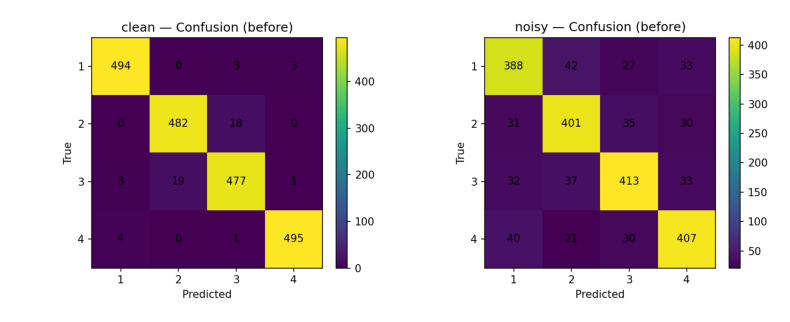

In [4]:
clean_cm_img = np.asarray(Image.open(clean_result_path+"/cm_before.png"))
noisy_cm_img = np.asarray(Image.open(noisy_result_path+"/cm_before.png"))

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(clean_cm_img)
ax[0].axis(False)

ax[1].imshow(noisy_cm_img)
ax[1].axis(False)

fig.tight_layout()

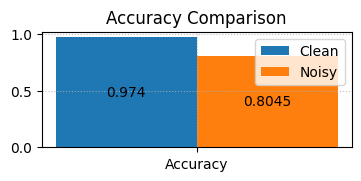

Accuracy Comparison
---------------------------------------------------------------------------
Clean		: 0.974
Noisy		: 0.804
Clean - Noisy	: 0.169
Clean dataset Accuracy is 21.069% higher than the noisy dataset
---------------------------------------------------------------------------


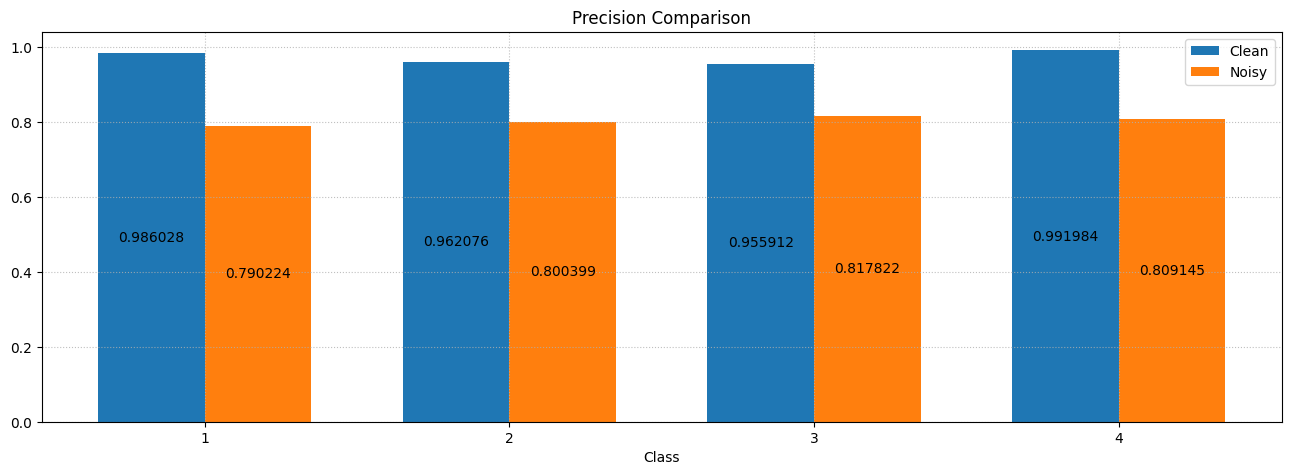

Precision Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.986
Noisy		: 0.790
Clean - Noisy	: 0.196
Clean dataset Precision is 24.778% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.962
Noisy		: 0.800
Clean - Noisy	: 0.162
Clean dataset Precision is 20.200% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.956
Noisy		: 0.818
Clean - Noisy	: 0.138
Clean dataset Precision is 16.885% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.992
Noisy		: 0.809
Clean - Noisy	: 0.183
Clean dataset Precision is 22.597% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean dataset Precision is 21.084% hi

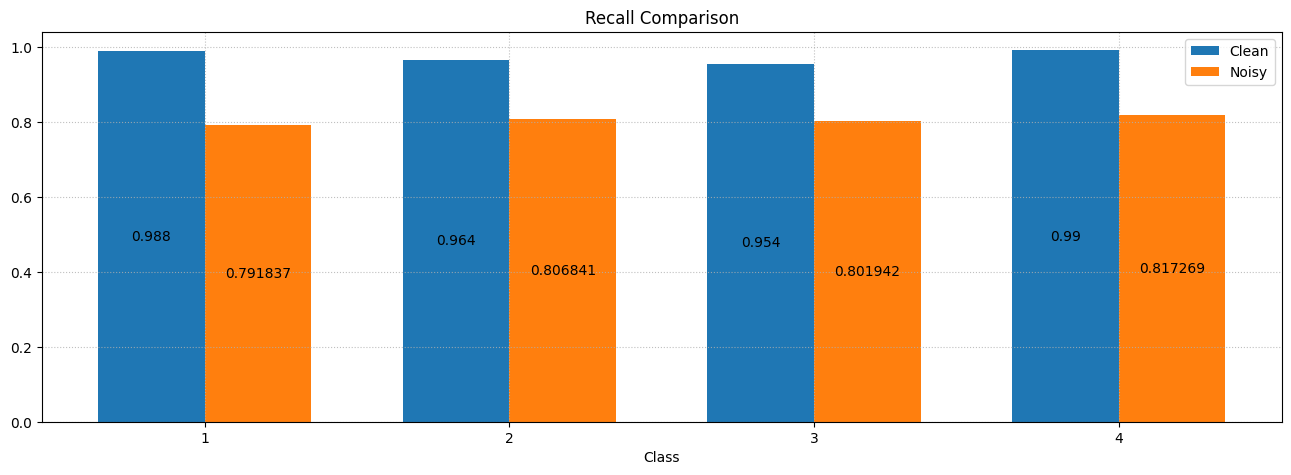

Recall Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.988
Noisy		: 0.792
Clean - Noisy	: 0.196
Clean dataset Recall is 24.773% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.964
Noisy		: 0.807
Clean - Noisy	: 0.157
Clean dataset Recall is 19.478% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.954
Noisy		: 0.802
Clean - Noisy	: 0.152
Clean dataset Recall is 18.961% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.990
Noisy		: 0.817
Clean - Noisy	: 0.173
Clean dataset Recall is 21.135% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean dataset Recall is 21.073% higher than the nois

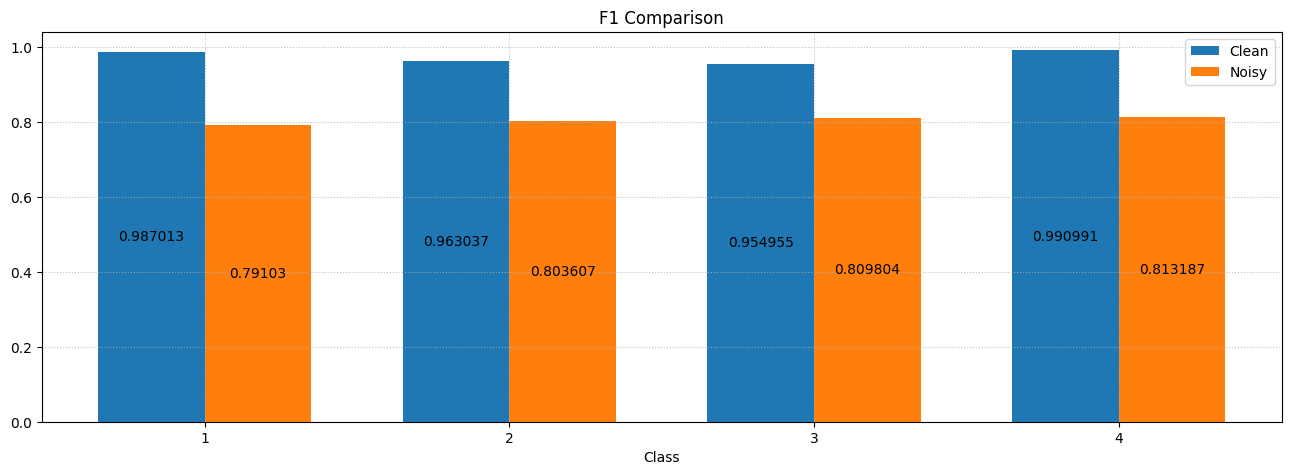

F1 Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.987
Noisy		: 0.791
Clean - Noisy	: 0.196
Clean dataset F1 is 24.776% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.963
Noisy		: 0.804
Clean - Noisy	: 0.159
Clean dataset F1 is 19.839% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.955
Noisy		: 0.810
Clean - Noisy	: 0.145
Clean dataset F1 is 17.924% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.991
Noisy		: 0.813
Clean - Noisy	: 0.178
Clean dataset F1 is 21.865% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean dataset F1 is 21.083% higher than the noisy dataset
--------------

In [5]:
def plot_multi_bar(labels, y_clean, y_noisy, title, xaxis_label = "", yaxis_label = ""):
    # Number of Enthusiasts for different regions
    plt.figure(figsize=(4*len(labels), 1.5**len(labels)))
    bar_width = 0.35
    x = np.arange(len(labels))

    # Grouped Bar Plot
    p_clean = plt.bar(x - bar_width/2, y_clean, bar_width, label='Clean')
    plt.bar_label(p_clean, label_type="center")
    p_noisy = plt.bar(x + bar_width/2, y_noisy, bar_width, label='Noisy')
    plt.bar_label(p_noisy, label_type="center")

    # Adding labels and title
    plt.title(title)
    plt.xticks(x, labels)
    if(xaxis_label != ""):
        plt.xlabel(xaxis_label)
    if(yaxis_label != ""):
        plt.ylabel(yaxis_label)
    plt.grid(True, alpha=0.8, linestyle=":")
    plt.legend(loc="upper right")
    plt.show()

def print_dashes(n=75):
    print("-"*n)

def metrics_diff(metric_name, metrics_clean, metrics_noisy, labels=""):
    #print(f"{metric_name} Comparison")
    
    if(type(labels) == list):
        plot_multi_bar(labels, metrics_clean, metrics_noisy, f"{metric_name} Comparison", xaxis_label="Class")
        print(f"{metric_name} Comparison")
        print_dashes()
        for i in range(len(labels)):
            print(f"Class-{labels[i]}:")
            print(f"Clean\t\t: {metrics_clean[i]:.3f}")
            print(f"Noisy\t\t: {metrics_noisy[i]:.3f}")
            print(f"Clean - Noisy\t: {metrics_clean[i] - metrics_noisy[i]:.3f}")
            print(f"Clean dataset {metric_name} is {((metrics_clean[i] - metrics_noisy[i])/metrics_noisy[i])*100:.3f}% higher than the noisy dataset")
            print_dashes()
        print("Average")
        print(f"Clean\t\t: {np.average(metrics_clean):.3f}")
        print(f"Noisy\t\t: {np.average(metrics_noisy):.3f}")
        print(f"Clean-Noisy\t: {np.average(metrics_clean)-np.average(metrics_noisy):.3f}")
        print(f"Clean dataset {metric_name} is {((np.average(metrics_clean)-np.average(metrics_noisy))/np.average(metrics_noisy))*100:.3f}% higher than the noisy dataset")
        print_dashes()
    else:
        plot_multi_bar([metric_name], metrics_clean, metrics_noisy, f"{metric_name} Comparison")
        print(f"{metric_name} Comparison")
        print_dashes()
        print(f"Clean\t\t: {metrics_clean:.3f}")
        print(f"Noisy\t\t: {metrics_noisy:.3f}")
        print(f"Clean - Noisy\t: {metrics_clean - metrics_noisy:.3f}")
        print(f"Clean dataset {metric_name} is {((metrics_clean - metrics_noisy)/metrics_noisy)*100:.3f}% higher than the noisy dataset")
        print_dashes()

#plot_multi_bar(["accuracy"], clean_metrics["accuracy"], noisy_metrics["accuracy"], "Accuracy Comparison")
#plot_multi_bar(clean_metrics["labels"], clean_metrics["per_class"]["precision"], noisy_metrics["per_class"]["precision"], "Precision Comparison", xaxis_label="Class")
#plot_multi_bar(clean_metrics["labels"], clean_metrics["per_class"]["recall"], noisy_metrics["per_class"]["recall"], "Recall Comparison", xaxis_label="Class")
#plot_multi_bar(clean_metrics["labels"], clean_metrics["per_class"]["f1"], noisy_metrics["per_class"]["f1"], "F1 Comparison", xaxis_label="Class")
metrics_diff("Accuracy", clean_metrics["accuracy"], noisy_metrics["accuracy"])
metrics_diff("Precision", clean_metrics["per_class"]["precision"], noisy_metrics["per_class"]["precision"], clean_metrics["labels"])
metrics_diff("Recall", clean_metrics["per_class"]["recall"], noisy_metrics["per_class"]["recall"], clean_metrics["labels"])
metrics_diff("F1", clean_metrics["per_class"]["f1"], noisy_metrics["per_class"]["f1"], clean_metrics["labels"])


## Clean vs Noisy Tree Properties

In [6]:
print(clean_depth_leaf)
print(noisy_depth_leaf)

{'avg_depth_before': 12.2, 'std_depth_before': 0.7483314773547883, 'avg_leaf_before': 41.3, 'std_leaf_before': 2.41039415863879, 'avg_depth_after': 8.8, 'std_depth_after': 3.1874754901018454, 'avg_leaf_after': 17.1, 'std_leaf_after': 4.90815647672321, 'median_chosen_prune_passes': 2}
{'avg_depth_before': 18.4, 'std_depth_before': 1.8000000000000003, 'avg_leaf_before': 301.2, 'std_leaf_before': 4.621688003316537, 'avg_depth_after': 13.7, 'std_depth_after': 2.3685438564654024, 'avg_leaf_after': 52.6, 'std_leaf_after': 12.109500402576483, 'median_chosen_prune_passes': 2}


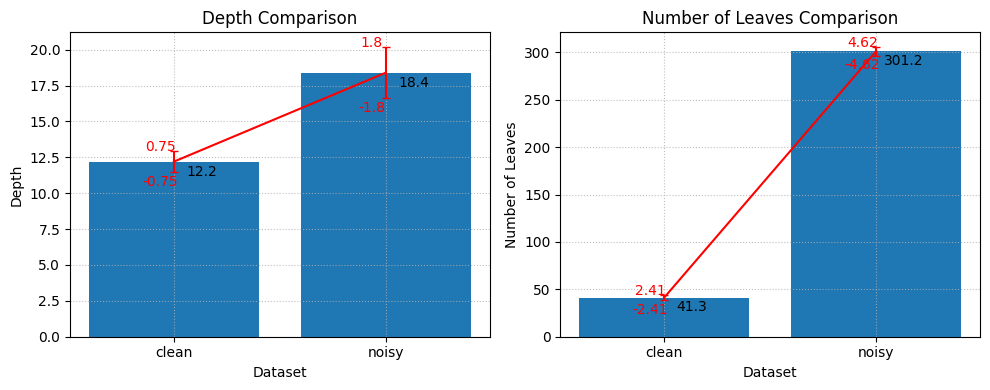

In [27]:
def plot_line_w_error(x, y, std, ax, metric_name):
    ax.bar(x, y)
    ax.errorbar(x, y, yerr=std, color="r", capsize=3)

    for X, Y, C in zip(x, y, std):
        C = round(C, 2)
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('{}'.format(Y), xy=(X,Y), xytext=(20, -10), ha='center',
                    textcoords='offset points', color="black")
        ax.annotate('{}'.format(C), xy=(X,Y+C), xytext=(-10, 0), ha='center',
                    textcoords='offset points', color="red")
        ax.annotate('{}'.format(-C), xy=(X,Y-C), xytext=(-10,-10), ha='center',
                    textcoords='offset points', color="red")
    ax.set_ylabel(f"{metric_name}")
    ax.set_xlabel("Dataset")
    ax.set_title(f"{metric_name} Comparison")
    ax.grid(True, alpha=0.8, linestyle=":")


x = ["clean", "noisy"]
y_depth = [clean_depth_leaf["avg_depth_before"], noisy_depth_leaf["avg_depth_before"]]
std_depth = [clean_depth_leaf["std_depth_before"], noisy_depth_leaf["std_depth_before"]]
y_leaf = [clean_depth_leaf["avg_leaf_before"], noisy_depth_leaf["avg_leaf_before"]]
std_leaf = [clean_depth_leaf["std_leaf_before"], noisy_depth_leaf["std_leaf_before"]]

fig, ax = plt.subplots(1,2, figsize=(10,4))
plot_line_w_error(x, y_depth, std_depth, ax[0], "Depth")
plot_line_w_error(x, y_leaf, std_leaf, ax[1], "Number of Leaves")

fig.tight_layout()

# Dataset differences

In [14]:
data_path_clean = data_path + "/clean_dataset.txt"
data_path_noisy = data_path + "/noisy_dataset.txt"

X_clean, y_clean = load_wifi_dataset(data_path_clean)
X_noisy, y_noisy = load_wifi_dataset(data_path_noisy)

clean_classes, clean_classes_count = np.unique(y_clean, return_counts=True)
noisy_classes, noisy_classes_count = np.unique(y_noisy, return_counts=True)

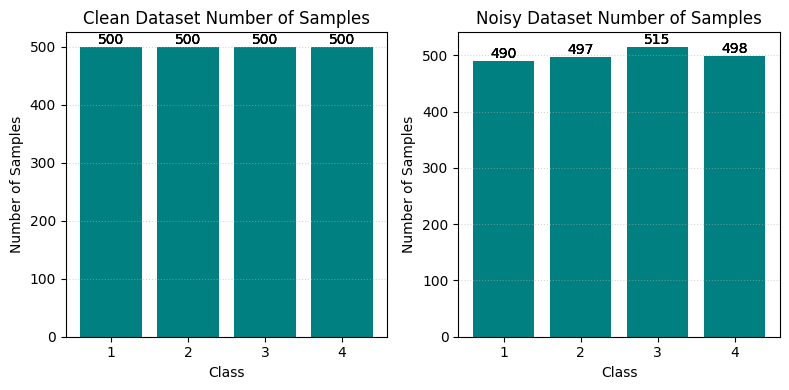

In [15]:
def plot_barchart(x, y, data_type, ax):
    for i in range(len(x)):
        p = ax.bar(x, y, color="teal")
        ax.bar_label(p)
    ax.set_title(f"{data_type} Dataset Number of Samples")
    ax.set_ylabel("Number of Samples")
    ax.set_xlabel("Class")
    ax.yaxis.grid(True, alpha=0.5, linestyle=":")

fig, ax = plt.subplots(1,2, figsize=(8,4))
plot_barchart(clean_classes, clean_classes_count, "Clean", ax[0])
plot_barchart(noisy_classes, noisy_classes_count, "Noisy", ax[1])
fig.tight_layout()

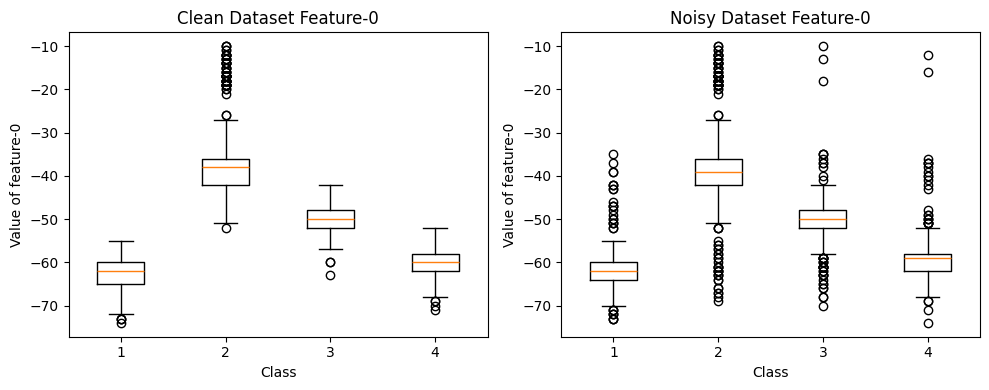

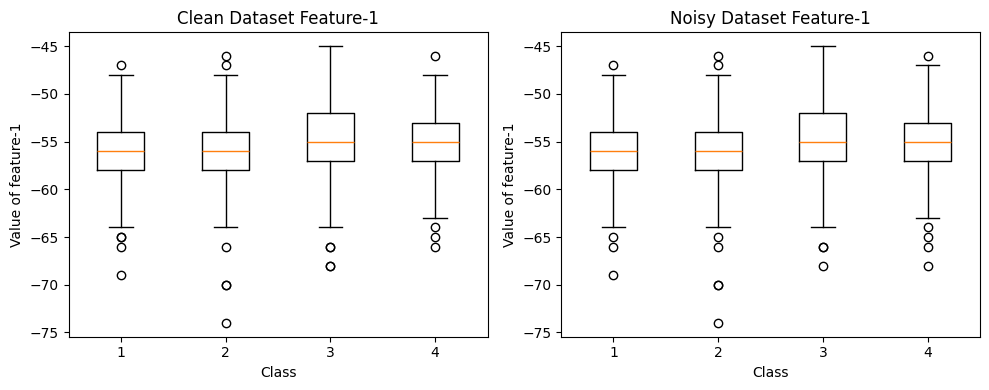

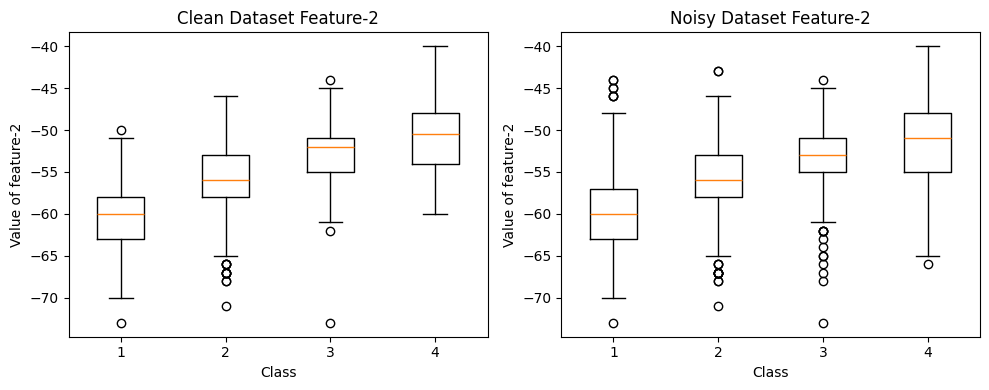

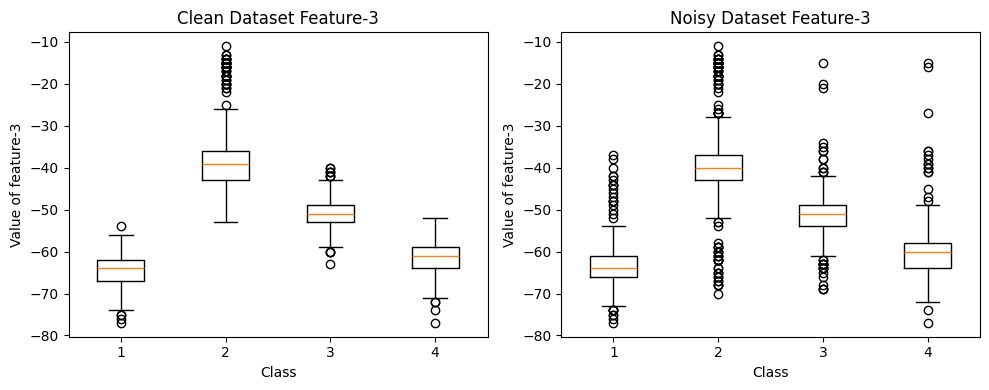

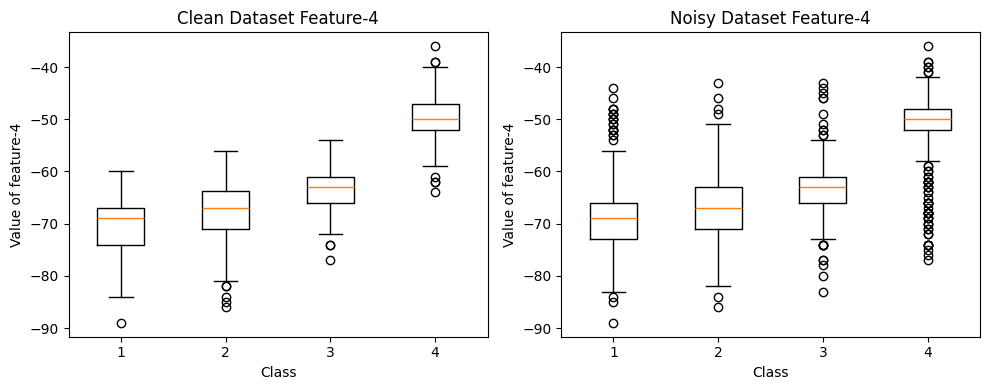

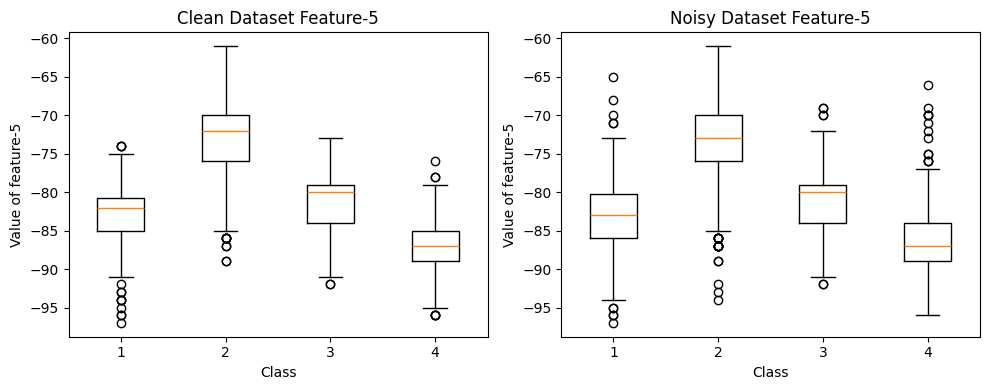

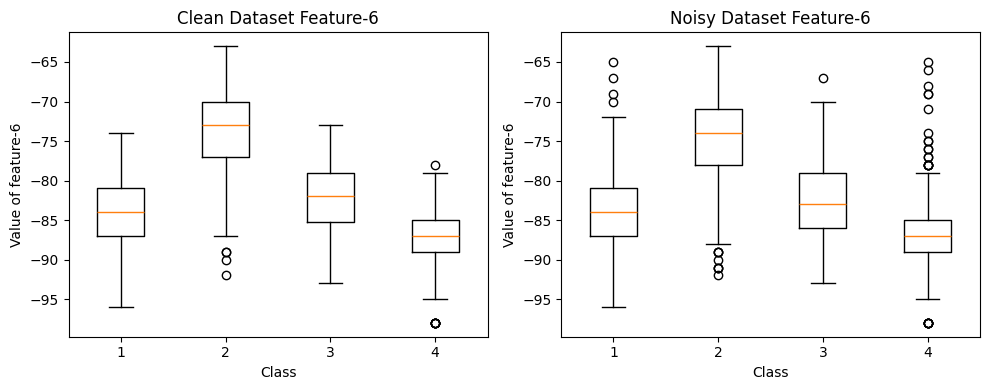

In [78]:
clean_label_feature_dic = {}
noisy_label_feature_dic = {}
for i in range(X_clean.shape[1]):
    clean_label_feature_dic[i] = {}
    noisy_label_feature_dic[i] = {}
    for j in range(len(np.unique(y_clean))):
        clean_label_feature_dic[i][j+1] = X_clean[y_clean==j+1][:,i]
        noisy_label_feature_dic[i][j+1] = X_noisy[y_noisy==j+1][:,i]

for idx, y in enumerate(clean_label_feature_dic):
    spread_feature_y_clean = clean_label_feature_dic[y]
    spread_feature_y_noisy = noisy_label_feature_dic[y]
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    ax[0].boxplot(spread_feature_y_clean.values())
    ax[0].set_xticklabels(spread_feature_y_clean.keys())
    ax[0].set_title(f"Clean Dataset Feature-{y}")
    ax[0].set_xlabel("Class")
    ax[0].set_ylabel(f"Value of feature-{y}")

    ax[1].boxplot(spread_feature_y_noisy.values())
    ax[1].set_xticklabels(spread_feature_y_noisy.keys())
    ax[1].set_title(f"Noisy Dataset Feature-{y}")
    ax[1].set_xlabel("Class")
    ax[1].set_ylabel(f"Value of feature-{y}")

    fig.tight_layout()
